Accuracy: 0.7686302342086586


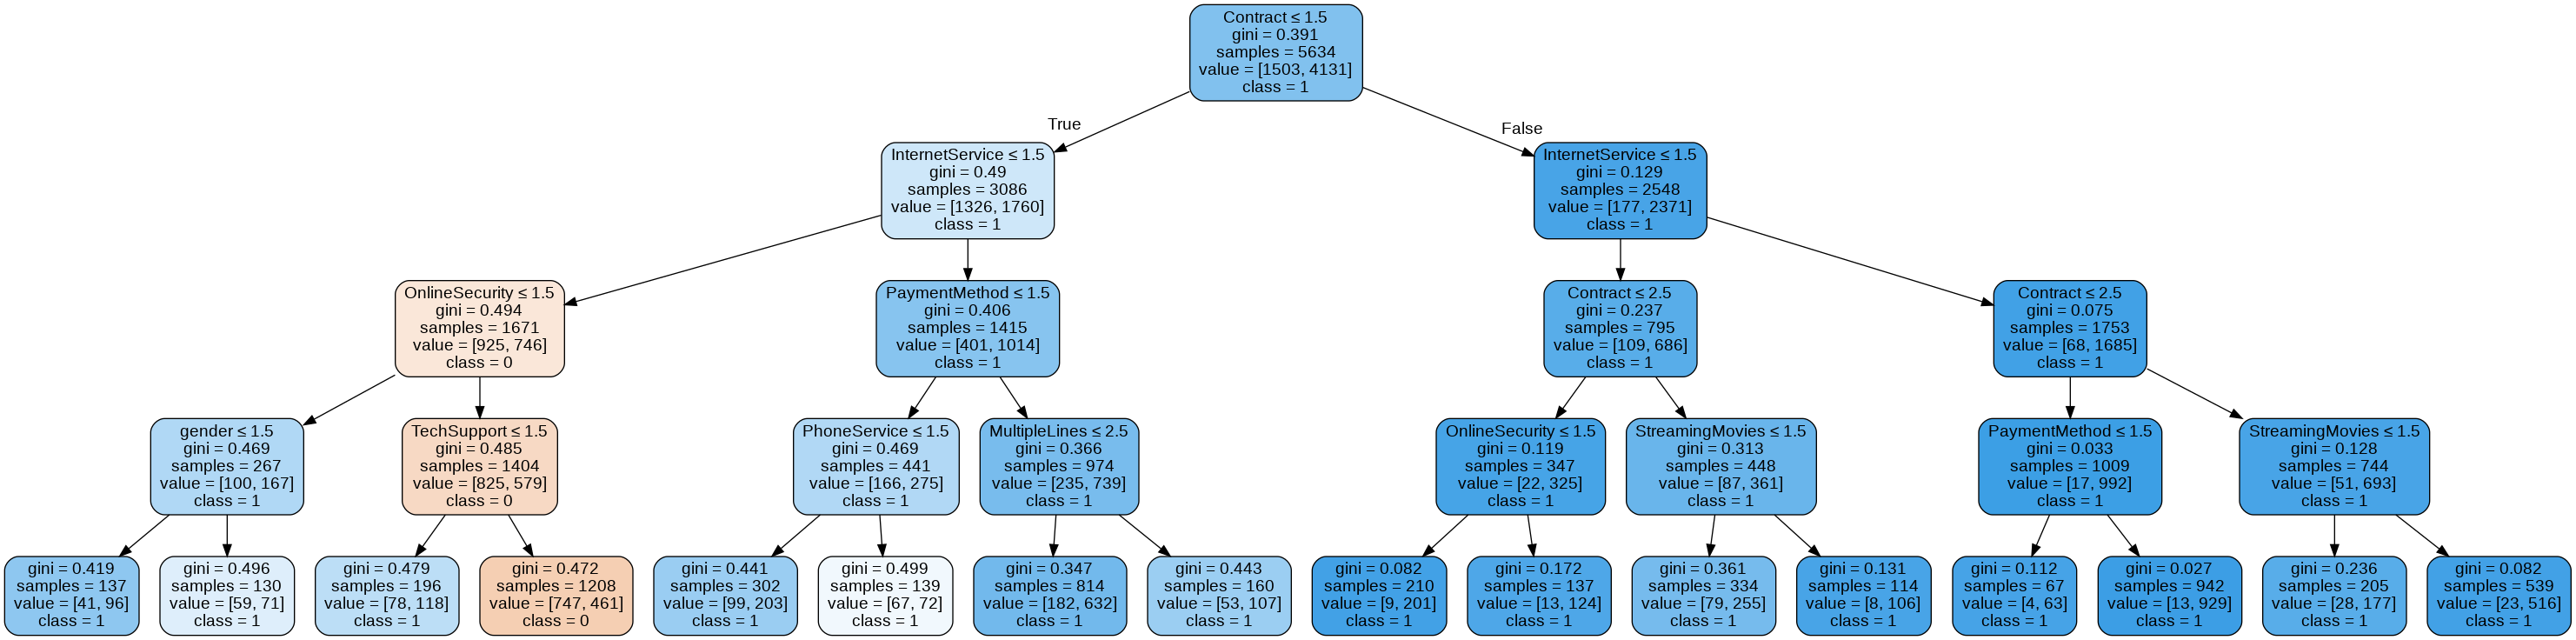

In [68]:
# Here is code to pull the dataset and relevant libraries 
# into a Google Colab or Jupyter notebook to help get you started
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv')
df.tail()


#Exploratory Data Analysis
cat_df = df.select_dtypes(include=['object']).copy()   #Copying columns with data type object
cat_df.head()
print(cat_df.isnull().values.sum())      #checking the count of null values
print(cat_df['gender'].value_counts())  #checking the distribution of values for each category in a column
print(cat_df['Partner'].value_counts())
print(cat_df['Dependents'].value_counts())
print(cat_df['PhoneService'].value_counts())
print(cat_df['MultipleLines'].value_counts())
print(cat_df['InternetService'].value_counts())
print(cat_df['OnlineSecurity'].value_counts())
print(cat_df['OnlineBackup'].value_counts())
print(cat_df['DeviceProtection'].value_counts())
print(cat_df['TechSupport'].value_counts())
print(cat_df['StreamingTV'].value_counts())
print(cat_df['StreamingMovies'].value_counts())
print(cat_df['Contract'].value_counts())
print(cat_df['PaperlessBilling'].value_counts())
print(cat_df['PaymentMethod'].value_counts())
print(cat_df['TotalCharges'].value_counts())
print(cat_df['Churn'].value_counts())
print(cat_df['Partner'].value_counts().count()) #counting the number of categories in a column


cat_count = cat_df['PaymentMethod'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

#Encoding Categorical Data
replace_map_comp1 = {'InternetService': {'Fiber optic': 1, 'DSL': 2, 'No': 3}}
replace_map_comp2 = {'Partner': {'Yes': 1, 'No': 2}}
replace_map_comp3 = {'Dependents': {'Yes': 1, 'No': 2}}
replace_map_comp4 = {'PhoneService': {'Yes': 1, 'No': 2}}
replace_map_comp5 = {'MultipleLines': {'Yes': 1, 'No': 2, 'No phone service': 3}}
replace_map_comp6 = {'OnlineSecurity': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp7 = {'OnlineBackup': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp8 = {'DeviceProtection': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp9 = {'TechSupport': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp10 = {'StreamingTV': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp11 = {'StreamingMovies': {'Yes': 1, 'No': 2, 'No internet service': 3}}
replace_map_comp12 = {'Contract': {'Month-to-month': 1, 'Two year': 2, 'One year': 3}}
replace_map_comp13 = {'PaperlessBilling': {'Yes': 1, 'No': 2}}
replace_map_comp14 = {'PaymentMethod': {'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4}}
replace_map_comp15 = {'Churn': {'Yes': 1, 'No': 2}}
replace_map_comp16 = {'gender': {'Male': 1, 'Female': 2}}


cat_df_replace = cat_df.copy()
cat_df_replace.replace(replace_map_comp1, inplace=True)
cat_df_replace.replace(replace_map_comp2, inplace=True)
cat_df_replace.replace(replace_map_comp3, inplace=True)
cat_df_replace.replace(replace_map_comp4, inplace=True)
cat_df_replace.replace(replace_map_comp5, inplace=True)
cat_df_replace.replace(replace_map_comp6, inplace=True)
cat_df_replace.replace(replace_map_comp7, inplace=True)
cat_df_replace.replace(replace_map_comp8, inplace=True)
cat_df_replace.replace(replace_map_comp9, inplace=True)
cat_df_replace.replace(replace_map_comp10, inplace=True)
cat_df_replace.replace(replace_map_comp11, inplace=True)
cat_df_replace.replace(replace_map_comp12, inplace=True)
cat_df_replace.replace(replace_map_comp13, inplace=True)
cat_df_replace.replace(replace_map_comp14, inplace=True)
cat_df_replace.replace(replace_map_comp15, inplace=True)
cat_df_replace.replace(replace_map_comp16, inplace=True)


cat_df_replace.drop('TotalCharges', axis='columns', inplace=True)
cat_df_replace.drop('customerID', axis='columns', inplace=True)
#print(cat_df_replace.head())


X = cat_df_replace.drop('Churn', axis=1)
y = cat_df_replace['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#print(y_train.head())
#print(cat_df_replace.info())

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customer_Churn.png')
Image(graph.create_png())